#Model 1


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_df = pd.read_csv('/content/drive/MyDrive/mitbih_train.csv',header=None)
test_df = pd.read_csv('/content/drive/MyDrive/mitbih_test.csv',header=None)

Mounted at /content/drive


In [ ]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1 model


In [ ]:
!pip install PyWavelets

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pywt


In [ ]:
train_df[187] = train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64


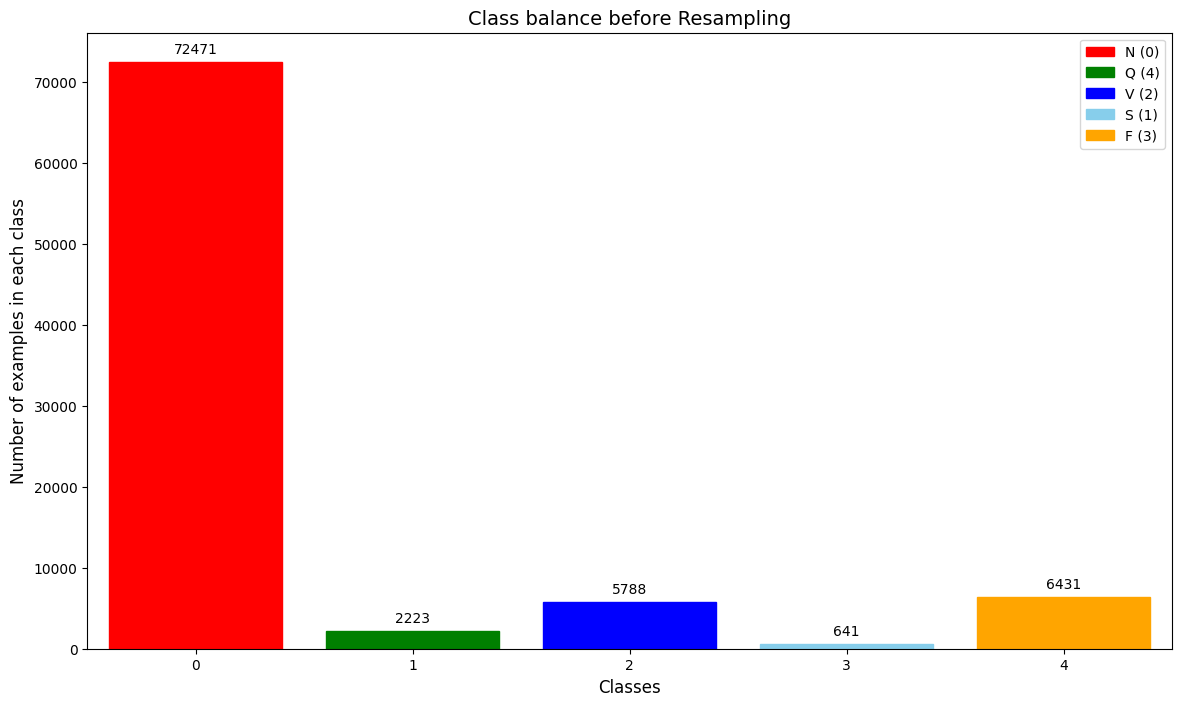

In [ ]:
def plot_class_balance(train_df, title):
    train_df[187] = train_df[187].astype(int)
    class_count = train_df[187].value_counts()

    # Define the colors and labels for each class
    colors = ['red', 'green', 'blue', 'skyblue', 'orange']
    labels = ['N (0)', 'Q (4)', 'V (2)', 'S (1)', 'F (3)']

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(14, 8))
    bars = sns.barplot(x=class_count.index, y=class_count.values)

    # Color each bar based on its class
    for i, bar in enumerate(bars.patches):
        bar.set_color(colors[i % len(colors)])

    # Annotate each bar with its count
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

    # Add legend, labels, and title
    handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
    plt.legend(handles, labels)
    plt.xlabel("Classes", fontsize=12)
    plt.ylabel("Number of examples in each class", fontsize=12)
    plt.title(title, fontsize=14)

    # Show the plot
    plt.show()

plot_class_balance(train_df, "Class balance before Resampling")


In [ ]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [ ]:
equilibre=train_df[187].value_counts()
print(equilibre)


187
0    20000
1    20000
2    20000
3    20000
4    20000
Name: count, dtype: int64


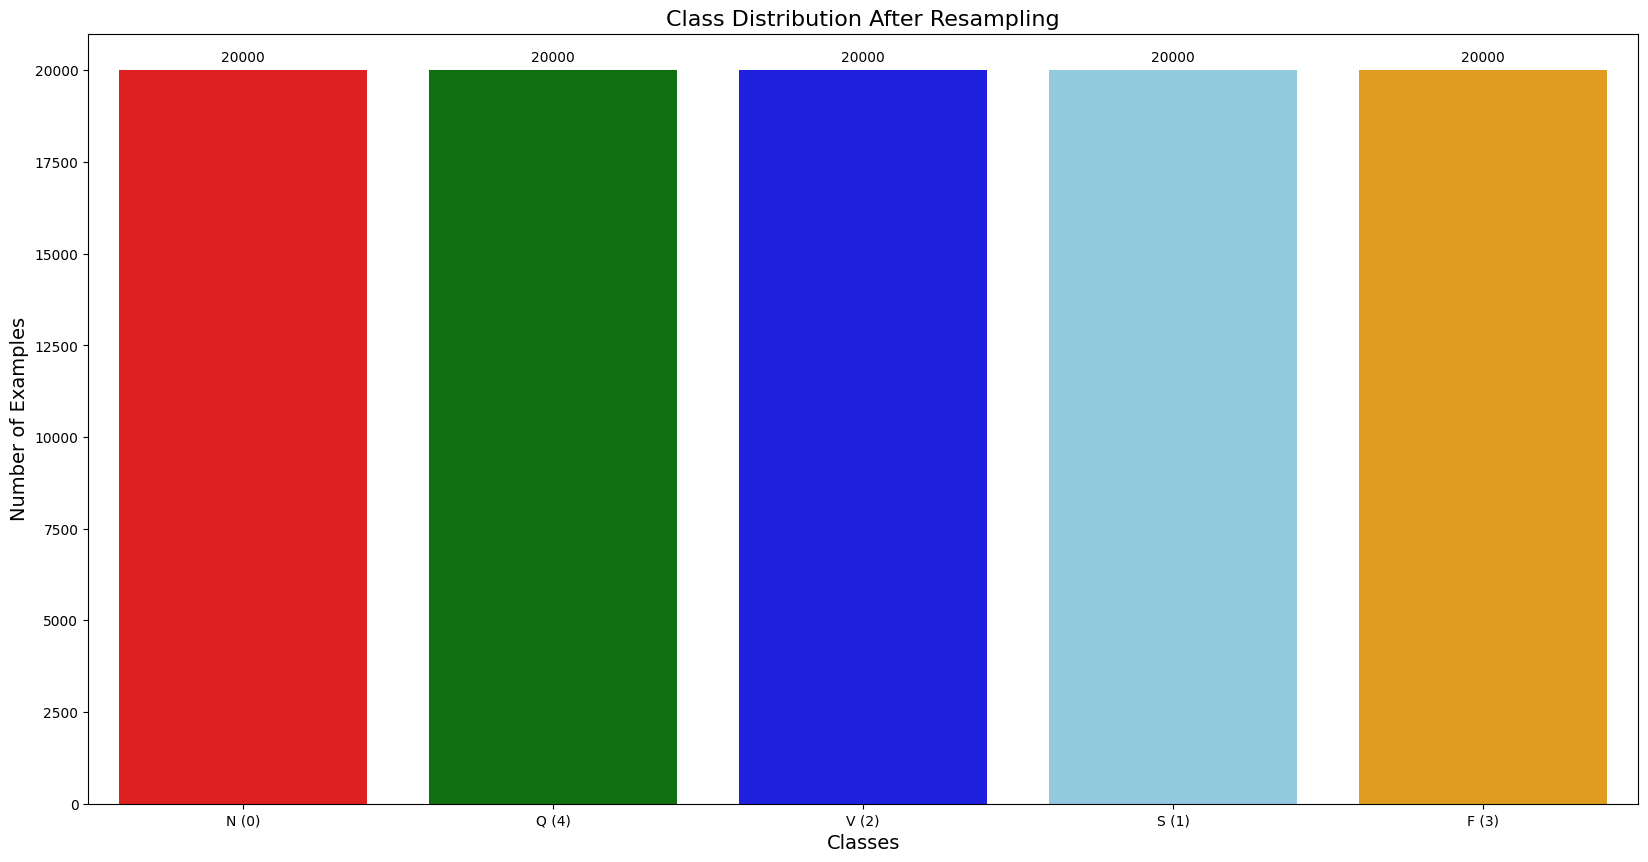

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'equilibre' contains the value counts for each class
class_counts = equilibre

# Set up the colors for different classes
colors = ['red', 'green', 'blue', 'skyblue', 'orange']
labels = ['N (0)', 'Q (4)', 'V (2)', 'S (1)', 'F (3)']

# Create the bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x=labels, y=class_counts, palette=colors)

# Annotate each bar with its count
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points')

# Set labels and title
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Number of Examples", fontsize=14)
plt.title("Class Distribution After Resampling", fontsize=16)

# Show the plot
plt.show()



In [ ]:
print("Statistical Data:")
print(train_df.describe())

# Calculate mean, median, and standard deviation
mean_values = train_df.mean()
median_values = train_df.median()
std_dev_values = train_df.std()

# Display mean, median, and standard deviation
print("\nMean Values:")
print(mean_values)

print("\nMedian Values:")
print(median_values)

print("\nStandard Deviation Values:")
print(std_dev_values)

Statistical Data:
                 0              1              2              3    \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.840585       0.736421       0.481091       0.313701   
std         0.280970       0.263010       0.251976       0.252200   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.827368       0.617081       0.281579       0.101449   
50%         0.972452       0.831761       0.486009       0.269704   
75%         1.000000       0.923858       0.656954       0.472222   
max         1.000000       1.000000       1.000000       1.000000   

                 4              5              6              7    \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.273039       0.265182       0.249509       0.236397   
std         0.225966       0.208125       0.203007       0.190732   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.1

In [ ]:
# Selecting a single point from each class for visualization
c = train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))
c.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
57297,1.000000,0.510934,0.200795,0.168986,0.059642,0.000000,0.055666,0.157058,0.244533,0.288270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
72801,0.954972,1.000000,0.489681,0.067542,0.046904,0.061914,0.050657,0.073171,0.153846,0.313321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
76754,0.992167,0.960836,0.859008,0.710183,0.545692,0.472585,0.438642,0.428198,0.459530,0.514360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80704,1.000000,0.810848,0.450626,0.147427,0.038943,0.116829,0.143255,0.114047,0.104312,0.104312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
86085,0.619355,0.548387,0.548387,0.458065,0.451613,0.406452,0.280645,0.322581,0.203226,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


Text(0.5, 1.0, 'Paced')

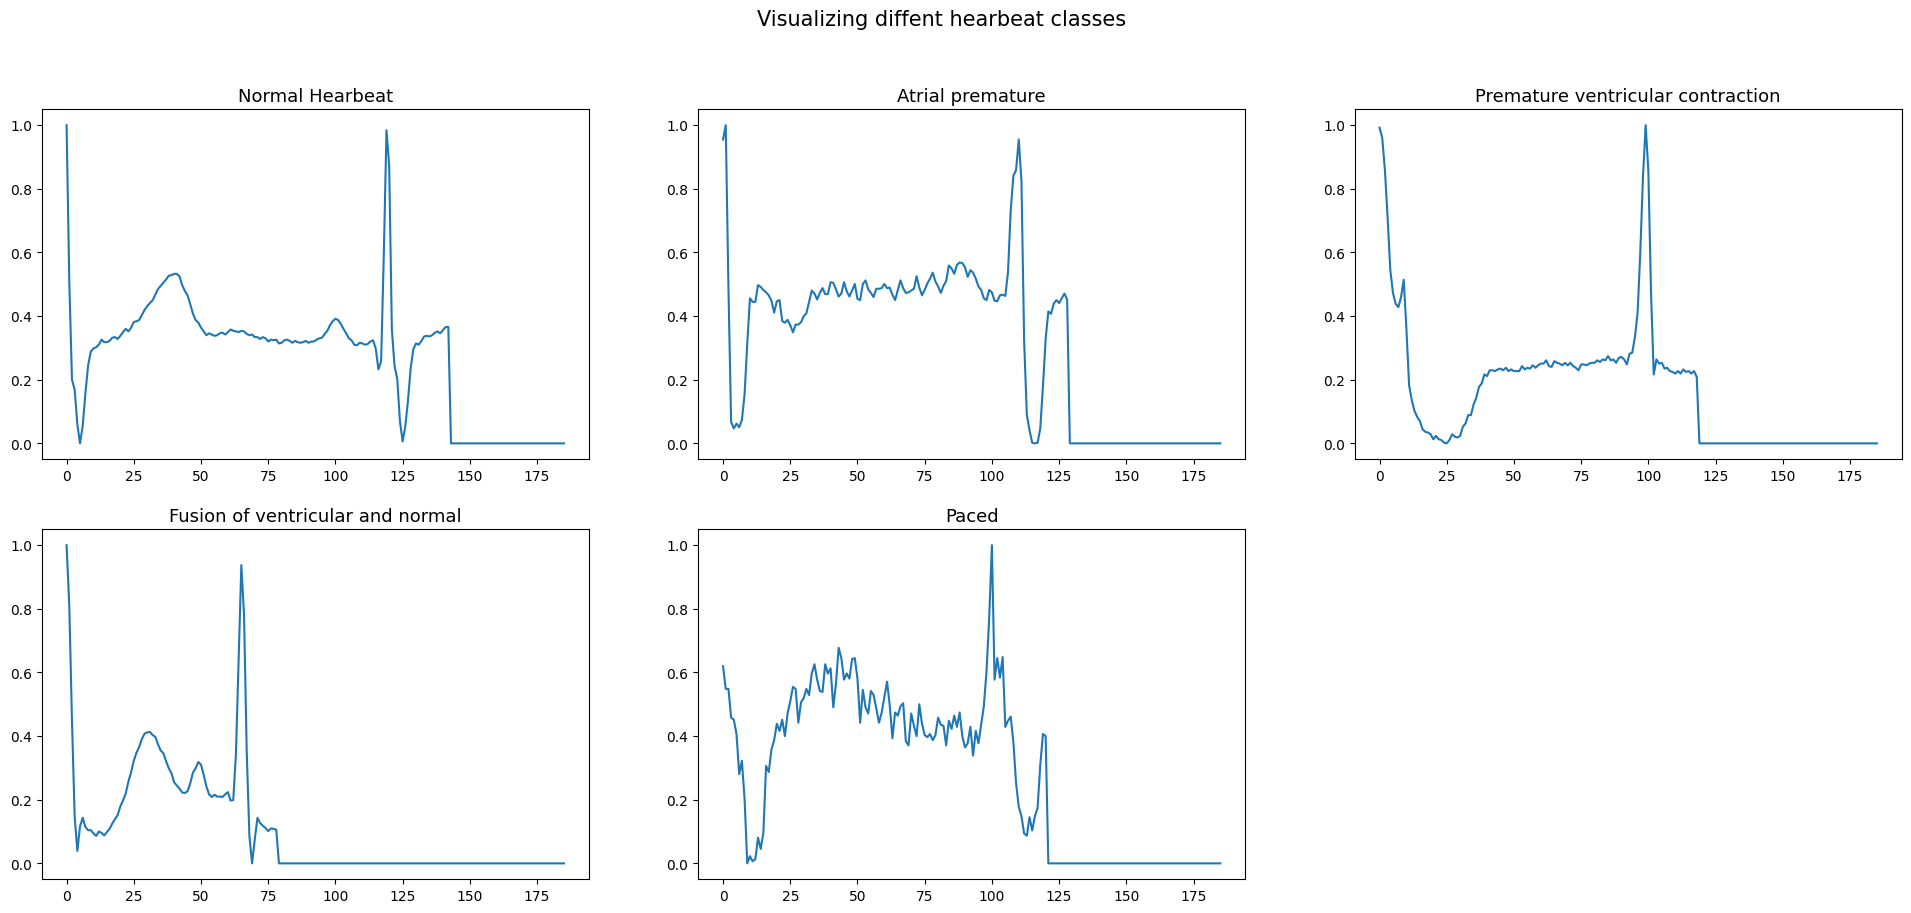

In [ ]:
plt.figure(figsize=(24,10))
plt.suptitle("Visualizing diffent hearbeat classes", fontsize=15)

ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (0, 2))
ax4 = plt.subplot2grid((2, 3), (1, 0))
ax5 = plt.subplot2grid((2, 3), (1, 1))


ax1.plot(c.iloc[0,:186])
ax1.set_title("Normal Hearbeat", fontsize=13)
ax2.plot(c.iloc[1,:186])
ax2.set_title("Atrial premature", fontsize=13)
ax3.plot(c.iloc[2,:186])
ax3.set_title("Premature ventricular contraction", fontsize=13)
ax4.plot(c.iloc[3,:186])
ax4.set_title("Fusion of ventricular and normal", fontsize=13)
ax5.plot(c.iloc[4,:186])
ax5.set_title("Paced", fontsize=13)

In [ ]:
X_train = train_df.iloc[:, 0:187].values
y_train = train_df.iloc[:, 187].values
X_test = test_df.iloc[:, 0:187].values
y_test = test_df.iloc[:, 187].values

#Features




#Model 3 (PSD and KNN usage)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.signal import welch
from sklearn.utils import resample
import warnings



In [ ]:
def calculate_psd(data):
    frequencies, power = welch(data, fs=100.0, window='hamming', nperseg=256, noverlap=128)
    return power

# Apply PSD feature extraction to each sample
X_train_psd = np.array([calculate_psd(sample) for sample in X_train])
X_test_psd = np.array([calculate_psd(sample) for sample in X_test])


In [ ]:
scaler = StandardScaler()
X_train_psd_scaled = scaler.fit_transform(X_train_psd)
X_test_psd_scaled = scaler.transform(X_test_psd)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_psd_scaled, y_train)


KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test_psd_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.88      0.93     18118
         1.0       0.34      0.81      0.48       556
         2.0       0.59      0.91      0.72      1448
         3.0       0.33      0.79      0.46       162
         4.0       0.87      0.96      0.91      1608

    accuracy                           0.89     21892
   macro avg       0.62      0.87      0.70     21892
weighted avg       0.93      0.89      0.90     21892

Accuracy Score: 0.8878128996893843
